Probability (OK): 0.039799
Predicted class: Not OK


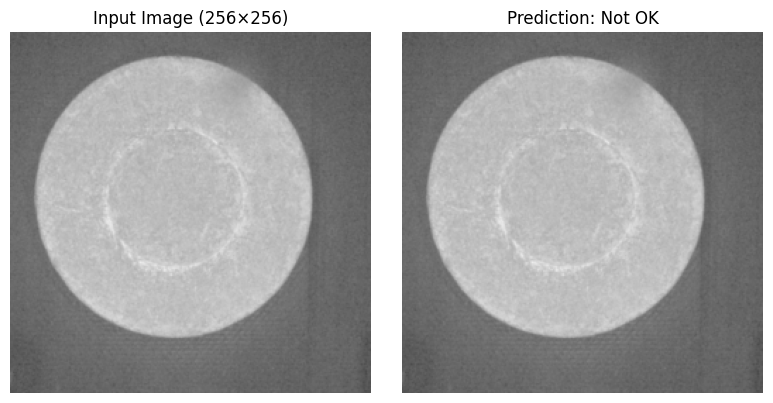

In [27]:
import pickle
import torch
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

# Device
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load PKL model
with open("defect_cnn.pkl", "rb") as f:
    bundle = pickle.load(f)

model = bundle["model"].to(DEVICE)
model.eval()

# ----------------------------------
# TRANSFORMS (same as training)
# ----------------------------------
transform = transforms.Compose([
    transforms.Resize((256, 256)),   # only if training resized
    transforms.ToTensor()             # NO normalization
])

# ----------------------------------
# Load image
# ----------------------------------
img = Image.open("11.jpg").convert("RGB")

# Resize-only image (for display)
resized_img = transforms.Resize((256, 256))(img)

# Tensor for model
img_tensor = transform(img).unsqueeze(0).to(DEVICE)

# ----------------------------------
# Prediction (CORRECT decoding)
# ----------------------------------
with torch.no_grad():
    logit = model(img_tensor)                 # shape [1,1]
    prob_ok = torch.sigmoid(logit).item()     # P(OK)

# Training: 1 = OK, 0 = Not OK
if prob_ok >= 0.5:
    predicted_label = "OK"
else:
    predicted_label = "Not OK"

print(f"Probability (OK): {prob_ok:.6f}")
print("Predicted class:", predicted_label)

# ----------------------------------
# Visualization
# ----------------------------------
vis = img_tensor.squeeze().cpu().clamp(0, 1)

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(resized_img)
plt.title("Input Image (256×256)")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(vis.permute(1, 2, 0))
plt.title(f"Prediction: {predicted_label}")
plt.axis("off")

plt.tight_layout()
plt.show()


In [28]:
with torch.no_grad():
    logit = model(img_tensor)
    prob_ok = torch.sigmoid(logit)   # probability of OK

print("Probability (OK):", prob_ok.item())

if prob_ok >= 0.5:
    prediction = "OK"
else:
    prediction = "Not OK"

print("Prediction:", prediction)


Probability (OK): 0.03979865834116936
Prediction: Not OK
